# Episode grading
In this notebook, we'll go through the grades, each member of the [zylonensender](https://zahlensender.net/bsg) crew gave over the course of the series [Battlestar Galactica](https://en.wikipedia.org/wiki/Battlestar_Galactica_(2004_TV_series)). We'll have some look over the average grades per episode, how our individual podcasters' verdict was (so, who was the most "critical" and who was the most "benelovent"), what the worst episodes were, and which were the best...and how our verdicts compare to the IMDB one.

In [85]:
# some libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
%matplotlib inline

In [120]:
# define colors and identifyers for the podcasters
podcasters = ['Tim', 'Benjamin', 'Marijo', 'Phil', 'Jan']
colors = {'Tim': "#2e8b57",
         'Benjamin': "#e07b39",
         'Phil': "#195e83",
         'Marijo': "#b63132",
         'Jan': "#7e839c"}
imgs = {'Tim': "../imgs/tim_50x50.jpg",
       'Benjamin': "../imgs/ben_51x50.png",
       'Phil': "../imgs/phil_50x50.png",
       'Marijo': "../imgs/marijo_50x50.png",
       'Jan': "../imgs/jan_50x50.png"}

In [121]:
# import the data
data = pd.read_csv('../grades/zys_bewertungen.csv')
data = data.dropna()
data.head()

,Folgentitel,Episode,Sprecher,Wertung
0,Kein guter Hitler,S3E04,Benjamin,10.0
1,Die Drei von der Luftschleuse,S4E10,Benjamin,10.0
2,Schmu der Luftschleuse,S4E14,Benjamin,10.0
3,Mit dem Kopf durch die Wand,S2E10,Benjamin,9.0
4,Vier Toaster im ironischen Nebel,S3E20,Benjamin,9.0


# Attendance
Before we go into the votes and stuff, let's have a short look on the attendance. Presumably, Tim will come out on top, as the producer :)
But who is the most disciplined podcaster following him?

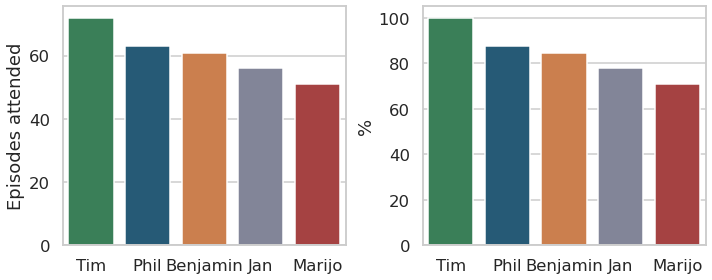

In [144]:
ranking = data['Sprecher'].value_counts()
ranking_percent = ranking / ranking['Tim'] * 100
fig, axs = plt.subplots(1,2, figsize=[10,4])
sns.barplot(x=ranking.index, y=ranking.values, ax=axs[0], palette=colors);
axs[0].set_ylabel('Episodes attended')
sns.barplot(x=ranking.index, y=ranking_percent.values, ax=axs[1], palette=colors);
axs[1].set_ylabel('%')
fig.tight_layout()

It's Phil, whose calm voiced opinions are such an important part of this podcast.

# Vote distributions  
Let's have a look at the vote distributions of each podcaster. Do they resemble a bell curve, are they skewed? We'll see...

In [123]:
def place_image(im, loc=3, ax=None, zoom=1, **kw):
    if ax==None: ax=plt.gca()
    imagebox = OffsetImage(im, zoom=zoom*0.72)
    ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False, **kw)
    ax.add_artist(ab)

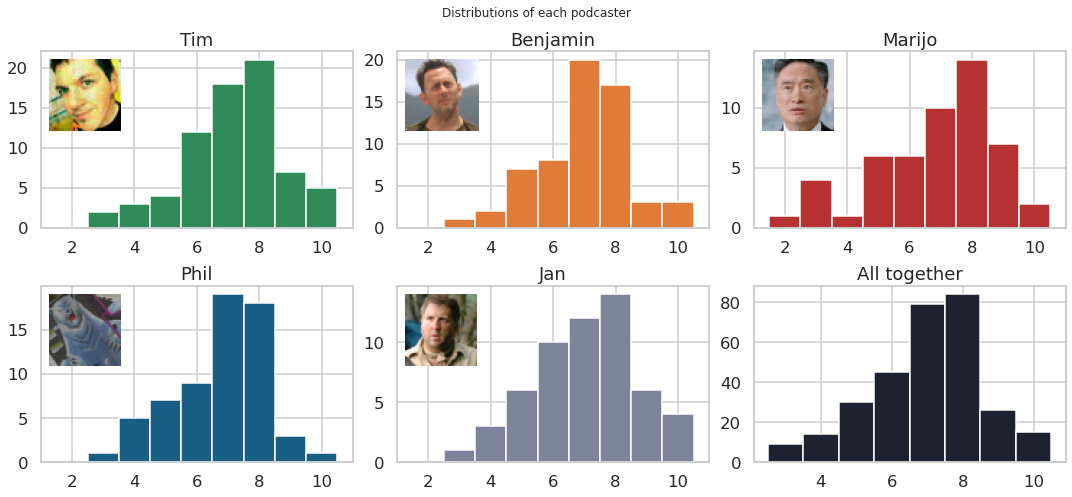

In [125]:
fig, axs = plt.subplots(nrows=2,ncols=3, sharex=False, figsize=[15,7])
fig.subplots_adjust(hspace=0.7)
fig.suptitle('Distributions of each podcaster')

for ax, name in zip(axs.flatten(), podcasters):
    # prepare bins to reflect the 1 to 10 points
    subs = data.query(f"Sprecher=='{name}'")['Wertung']
    d = np.diff(np.unique(subs)).min()
    left_of_first_bin = subs.min() - float(d)/2
    right_of_last_bin = subs.max() + float(d)/2
    
    # plot the histogram 
    ax.hist(subs, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d), color=colors[name])
    ax.set_title(name)
    ax.set_xlim([1, 11])
    
    # add some images
    im = plt.imread(imgs[name])
    place_image(im, loc=2, ax=ax, pad=0, zoom=2)

axs[1,2].hist(data['Wertung'], bins=np.arange(left_of_first_bin, right_of_last_bin + d, d), color='#1e212f')
axs[1,2].set_title('All together')

fig.tight_layout()